# Coding Block 1 - Classification Report, AUROC, AUPRC

### Load the packages

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report,auc
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from xgboost import XGBClassifier

'''
...
'''

'\n...\n'

### Read the dataset 

In [2]:
df = pd.read_csv("../data/diabetes.csv")
df_cleaned = pd.read_csv("../data/df_imputed_clean.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Rerun one of your last successful predictive models

In [4]:
data = df_cleaned.copy()
# Split the data into features (X) and target (y)
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

# Evaluate XGBoost model
y_pred_xgb = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)
xgb_roc_auc = roc_auc_score(y_test, xgb_classifier.predict_proba(X_test)[:, 1])

# Print results for XGBoost
print("\nXGBoost Results:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1-Score: {xgb_f1:.4f}")
print(f"ROC-AUC: {xgb_roc_auc:.4f}")
print("\nClassification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb, target_names=["No Diabetes", "Diabetes"]))


XGBoost Results:
Accuracy: 0.8288
Precision: 0.8000
Recall: 0.6531
F1-Score: 0.7191
ROC-AUC: 0.8986

Classification Report for XGBoost:
              precision    recall  f1-score   support

 No Diabetes       0.84      0.92      0.88        97
    Diabetes       0.80      0.65      0.72        49

    accuracy                           0.83       146
   macro avg       0.82      0.79      0.80       146
weighted avg       0.83      0.83      0.82       146



### Produce the classification report for the model
function "classification_report" from scikit-learn package

### Plot a ROC curve and a Precision-Recall-Curve for the model

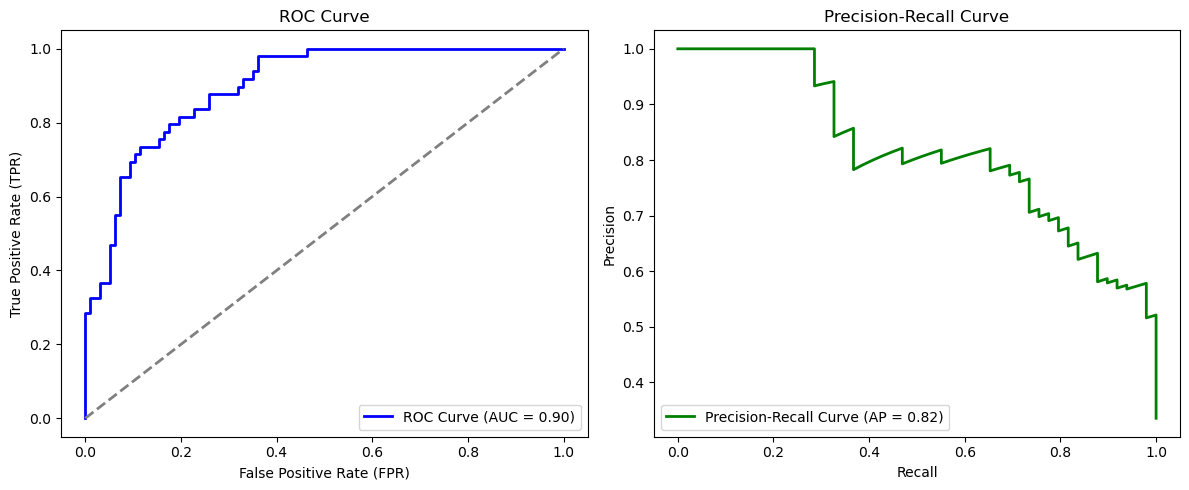

In [7]:
model = xgb_classifier

# Step 4: Generate predicted probabilities for the positive class
y_proba = model.predict_proba(X_test)[:, 1]

# Step 5: Compute ROC curve and AUC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Step 6: Compute Precision-Recall curve and Average Precision
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)
average_precision = average_precision_score(y_test, y_proba)

# Step 7: Plot the ROC curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Step 8: Plot the Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

### Determine the AUROC and AUPRC metrics

AUROC (Area Under the ROC Curve): 0.8986
AUPRC (Area Under the Precision-Recall Curve): 0.8194


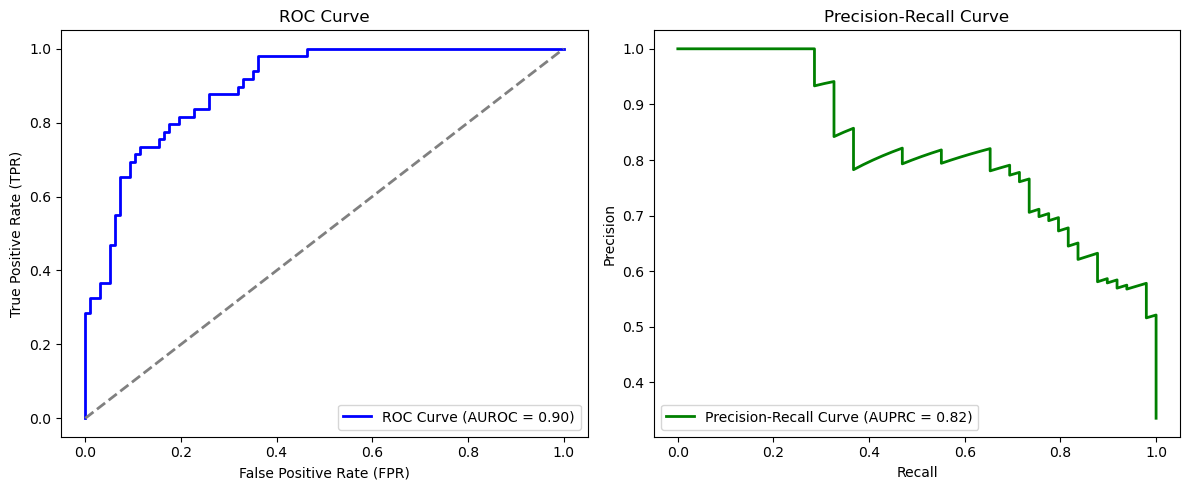

In [9]:
# Step 5: Compute ROC curve and AUROC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)  # AUROC

# Step 6: Compute Precision-Recall curve and AUPRC
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)
average_precision = average_precision_score(y_test, y_proba)  # AUPRC

# Step 7: Print AUROC and AUPRC
print(f"AUROC (Area Under the ROC Curve): {roc_auc:.4f}")
print(f"AUPRC (Area Under the Precision-Recall Curve): {average_precision:.4f}")

# Step 8: Plot the ROC curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUROC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Step 9: Plot the Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall Curve (AUPRC = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()